In [5]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('../data/raw_insurance.csv', low_memory=False)

#### Province Analysis

In [6]:
# Group by Province
province_stats = df.groupby('Province').agg(
    TotalPremium=('TotalPremium', 'sum'),
    TotalClaims=('TotalClaims', 'sum'),
    PolicyCount=('PolicyID', 'nunique')
).reset_index()

province_stats['LossRatio'] = province_stats['TotalClaims'] / province_stats['TotalPremium']
province_stats = province_stats.sort_values('LossRatio', ascending=False)

print("=== OVERALL LOSS RATIO ===")
print(f"Overall: {df['TotalClaims'].sum() / df['TotalPremium'].sum():.1%}")

print("\n=== TOP 5 RISKIEST PROVINCES ===")
print(province_stats.head(5)[['Province', 'LossRatio', 'TotalPremium', 'TotalClaims']])

print("\n=== TOP 5 SAFEST PROVINCES ===")
print(province_stats.tail(5)[['Province', 'LossRatio', 'TotalPremium', 'TotalClaims']])

=== OVERALL LOSS RATIO ===
Overall: 104.8%

=== TOP 5 RISKIEST PROVINCES ===
        Province  LossRatio  TotalPremium   TotalClaims
2        Gauteng   1.222018  2.405377e+07  2.939415e+07
3  KwaZulu-Natal   1.082693  1.320908e+07  1.430138e+07
8   Western Cape   1.059472  9.806559e+06  1.038977e+07
6     North West   0.790367  7.490508e+06  5.920250e+06
5     Mpumalanga   0.720897  2.836292e+06  2.044675e+06

=== TOP 5 SAFEST PROVINCES ===
        Province  LossRatio  TotalPremium   TotalClaims
5     Mpumalanga   0.720897  2.836292e+06  2.044675e+06
1     Free State   0.680758  5.213632e+05  3.549223e+05
4        Limpopo   0.661199  1.537324e+06  1.016477e+06
0   Eastern Cape   0.633813  2.140104e+06  1.356427e+06
7  Northern Cape   0.282699  3.165581e+05  8.949051e+04


#### Gender Analysis

In [7]:
gender_stats = df.groupby('Gender').agg(
    TotalPremium=('TotalPremium', 'sum'),
    TotalClaims=('TotalClaims', 'sum'),
    PolicyCount=('PolicyID', 'nunique')
).reset_index()
gender_stats['LossRatio'] = gender_stats['TotalClaims'] / gender_stats['TotalPremium']

print("=== GENDER RISK COMPARISON ===")
print(gender_stats[['Gender', 'LossRatio', 'PolicyCount', 'TotalPremium', 'TotalClaims']])

=== GENDER RISK COMPARISON ===
          Gender  LossRatio  PolicyCount  TotalPremium   TotalClaims
0         Female   0.821879           35  3.044806e+05  2.502461e+05
1           Male   0.883910          232  1.580143e+06  1.396704e+06
2  Not specified   1.059311         6601  5.920275e+07  6.271410e+07


#### Vehicle Type Analysis

In [8]:
vehicle_stats = df.groupby('VehicleType').agg(
    TotalPremium=('TotalPremium', 'sum'),
    TotalClaims=('TotalClaims', 'sum'),
    PolicyCount=('PolicyID', 'nunique')
).reset_index()
vehicle_stats['LossRatio'] = vehicle_stats['TotalClaims'] / vehicle_stats['TotalPremium']
vehicle_stats = vehicle_stats.sort_values('LossRatio', ascending=False)

print("=== TOP 5 RISKIEST VEHICLE TYPES ===")
print(vehicle_stats.head(5)[['VehicleType', 'LossRatio', 'PolicyCount']])

=== TOP 5 RISKIEST VEHICLE TYPES ===
         VehicleType  LossRatio  PolicyCount
1   Heavy Commercial   1.628112           72
3  Medium Commercial   1.050251          457
4  Passenger Vehicle   1.048198         6695
2   Light Commercial   0.232066           39
0                Bus   0.137292            6


#### Visualizations

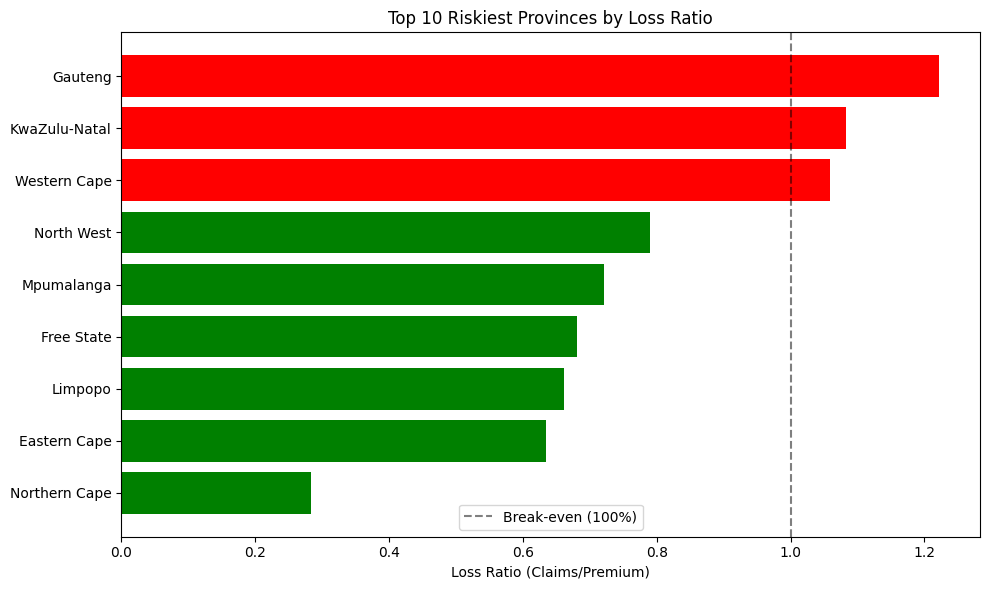

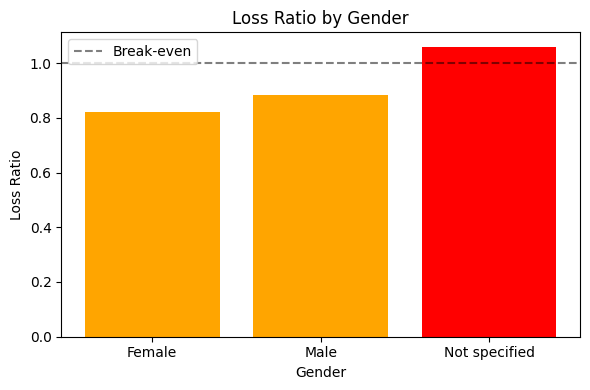

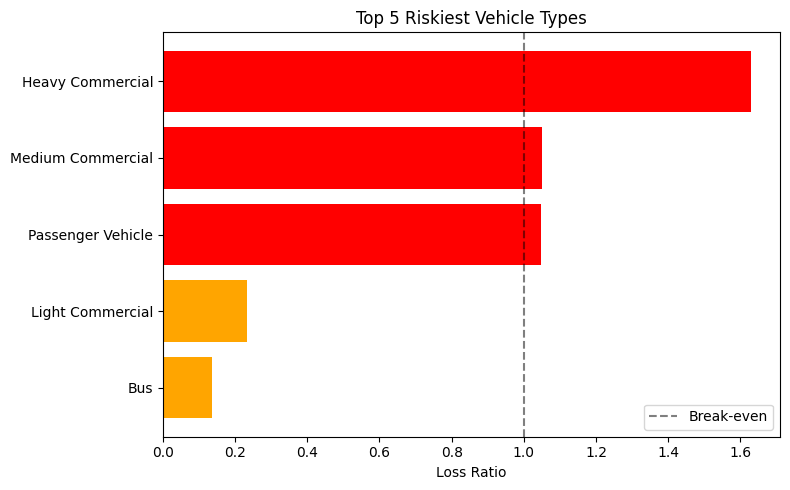

✅ 3 visualizations saved to /reports folder


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create reports folder if it doesn't exist
import os
os.makedirs('../reports', exist_ok=True)

# 1. Province Loss Ratio (Horizontal Bar)
plt.figure(figsize=(10, 6))
top10 = province_stats.head(10).sort_values('LossRatio', ascending=True)
plt.barh(top10['Province'], top10['LossRatio'], color=['red' if x > 1 else 'green' for x in top10['LossRatio']])
plt.axvline(x=1.0, color='black', linestyle='--', alpha=0.5, label='Break-even (100%)')
plt.xlabel('Loss Ratio (Claims/Premium)')
plt.title('Top 10 Riskiest Provinces by Loss Ratio')
plt.legend()
plt.tight_layout()
plt.savefig('../reports/province_risk.png', dpi=100)
plt.show()

# 2. Gender Loss Ratio
plt.figure(figsize=(6, 4))
colors = ['red' if x > 1 else 'orange' for x in gender_stats['LossRatio']]
plt.bar(gender_stats['Gender'], gender_stats['LossRatio'], color=colors)
plt.axhline(y=1.0, color='black', linestyle='--', alpha=0.5, label='Break-even')
plt.xlabel('Gender')
plt.ylabel('Loss Ratio')
plt.title('Loss Ratio by Gender')
plt.legend()
plt.tight_layout()
plt.savefig('../reports/gender_risk.png', dpi=100)
plt.show()

# 3. Vehicle Type Risk
plt.figure(figsize=(8, 5))
top_vehicles = vehicle_stats.head(5).sort_values('LossRatio', ascending=True)
colors = ['red' if x > 1 else 'orange' for x in top_vehicles['LossRatio']]
plt.barh(top_vehicles['VehicleType'], top_vehicles['LossRatio'], color=colors)
plt.axvline(x=1.0, color='black', linestyle='--', alpha=0.5, label='Break-even')
plt.xlabel('Loss Ratio')
plt.title('Top 5 Riskiest Vehicle Types')
plt.legend()
plt.tight_layout()
plt.savefig('../reports/vehicle_risk.png', dpi=100)
plt.show()

print("✅ 3 visualizations saved to /reports folder")